In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("./Dry_Bean.csv")

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

## Splitting the Data into Dependent and Independent Variables

In [5]:
x = data.drop(['Class'], axis=1)
y= data.Class

## Feature Importance 

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.06316307 0.07917899 0.06358933 0.07906215 0.07773042 0.05960891
 0.06559505 0.07187453 0.01328558 0.01714466 0.06380703 0.0845612
 0.08144706 0.07785266 0.07413415 0.02796521]


<AxesSubplot:>

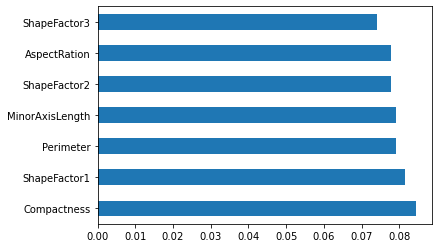

In [7]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(7).plot(kind='barh')

## Training and Testing the data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Logistic Regression

In [11]:
lm = LogisticRegression(random_state=20, n_jobs=5)
lm.fit(x_train, y_train)

LogisticRegression(n_jobs=5, random_state=20)

## Prediction

In [12]:
ypred_train = lm.predict(x_train)
ypred_test = lm.predict(x_test)

## Confusion Matrix

In [13]:
cm = confusion_matrix(y_test, ypred_test)
cm

array([[213,   0, 113,   0,  69,   0,   4],
       [  0, 143,   2,   0,   0,   0,   0],
       [102,   0, 380,   0,  14,   3,   1],
       [  0,   0,   0, 914,   7,  41,  81],
       [ 13,   0,  26,  24, 329,   9, 184],
       [  0,   0,   0, 137,  13, 375,  84],
       [  3,   0,   0,  59, 129, 116, 496]], dtype=int64)

## Accuracy

In [14]:
print("Accuracy of training data:", accuracy_score(y_train, ypred_train)*100)
ac1 = accuracy_score(y_test, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 70.10601448514747
Accuracy of testing data: 69.7845249755142


## Classification Report 

In [15]:
target_names = ['Class']
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

    BARBUNYA       0.64      0.53      0.58       399
      BOMBAY       1.00      0.99      0.99       145
        CALI       0.73      0.76      0.74       500
    DERMASON       0.81      0.88      0.84      1043
       HOROZ       0.59      0.56      0.57       585
       SEKER       0.69      0.62      0.65       609
        SIRA       0.58      0.62      0.60       803

    accuracy                           0.70      4084
   macro avg       0.72      0.71      0.71      4084
weighted avg       0.70      0.70      0.70      4084



## Decision Tree

In [16]:
data = DecisionTreeClassifier(random_state=42)
data.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

## Prediction

In [17]:
y_pred_train = data.predict(x_train)
y_pred_test = data.predict(x_test)

## Confusion Matrix

In [18]:
cm = np.array(confusion_matrix(ypred_test, y_test))
cm

array([[213,   0, 102,   0,  13,   0,   3],
       [  0, 143,   0,   0,   0,   0,   0],
       [113,   2, 380,   0,  26,   0,   0],
       [  0,   0,   0, 914,  24, 137,  59],
       [ 69,   0,  14,   7, 329,  13, 129],
       [  0,   0,   3,  41,   9, 375, 116],
       [  4,   0,   1,  81, 184,  84, 496]], dtype=int64)

## Accuracy

In [19]:
print("Accuracy of training data:", accuracy_score(y_train, ypred_train)*100)
ac2 = accuracy_score(y_test, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 70.10601448514747
Accuracy of testing data: 69.7845249755142


## Classification Report

In [20]:
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

    BARBUNYA       0.64      0.53      0.58       399
      BOMBAY       1.00      0.99      0.99       145
        CALI       0.73      0.76      0.74       500
    DERMASON       0.81      0.88      0.84      1043
       HOROZ       0.59      0.56      0.57       585
       SEKER       0.69      0.62      0.65       609
        SIRA       0.58      0.62      0.60       803

    accuracy                           0.70      4084
   macro avg       0.72      0.71      0.71      4084
weighted avg       0.70      0.70      0.70      4084



## K Nearest Neighbour

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Prediction

In [22]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

## Confusion Matrix

In [23]:
cm = np.array(confusion_matrix(y_pred_test, y_test))
cm

array([[197,   1, 150,   0,  62,   3,  12],
       [  0, 144,   0,   0,   0,   0,   0],
       [156,   0, 326,   0,  41,   0,   5],
       [  0,   0,   0, 923,  17, 108,  98],
       [ 35,   0,  22,   4, 378,   8,  62],
       [  0,   0,   0,  55,   1, 393,  38],
       [ 11,   0,   2,  61,  86,  97, 588]], dtype=int64)

## Accuracy

In [24]:
print("Accuracy of training data:", accuracy_score(y_train, y_pred_train)*100)
ac3 = accuracy_score(y_test, y_pred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 85.04251075889577
Accuracy of testing data: 72.20861900097944


## Classification Report 

In [25]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    BARBUNYA       0.46      0.49      0.48       399
      BOMBAY       1.00      0.99      1.00       145
        CALI       0.62      0.65      0.63       500
    DERMASON       0.81      0.88      0.84      1043
       HOROZ       0.74      0.65      0.69       585
       SEKER       0.81      0.65      0.72       609
        SIRA       0.70      0.73      0.71       803

    accuracy                           0.72      4084
   macro avg       0.73      0.72      0.72      4084
weighted avg       0.73      0.72      0.72      4084



## Random Forest 

In [26]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

## Prediction

In [27]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

## Confusion Matrix

In [28]:
cm = np.array(confusion_matrix(y_pred_test, y_test))
cm

array([[365,   1,  10,   0,   2,   2,   4],
       [  0, 144,   0,   0,   0,   0,   0],
       [ 23,   0, 478,   0,   9,   0,   2],
       [  0,   0,   0, 963,   3,  11,  62],
       [  3,   0,   7,   1, 558,   0,  10],
       [  3,   0,   0,  22,   0, 576,  13],
       [  5,   0,   5,  57,  13,  20, 712]], dtype=int64)

## Accuracy 

In [29]:
print("Accuracy of training data:", accuracy_score(y_train, y_pred_train)*100)
ac4 = accuracy_score(y_test, y_pred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 99.98950351632203
Accuracy of testing data: 92.94809010773751


## Classification Report 

In [30]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       399
      BOMBAY       1.00      0.99      1.00       145
        CALI       0.93      0.96      0.94       500
    DERMASON       0.93      0.92      0.93      1043
       HOROZ       0.96      0.95      0.96       585
       SEKER       0.94      0.95      0.94       609
        SIRA       0.88      0.89      0.88       803

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



## Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
cla = GaussianNB()
cla.fit(x_train, y_train)

GaussianNB()

In [32]:
y_pred = cla.predict(x_test)

In [33]:
cla.score(x_test,y_test)

0.7656709108716944

In [34]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[192   0 158   0  40   0   9]
 [  0 145   0   0   0   0   0]
 [ 80   2 398   0  19   0   1]
 [  0   0   0 875   0 126  42]
 [ 19   0  33  13 452   0  68]
 [  2   0   0  83   7 433  84]
 [  0   0   0  37  72  62 632]]


## Support Vector machine

In [35]:
from sklearn.svm import SVC

In [36]:
SVCclf = SVC()
SVCclf.fit(x_train, y_train)

SVC()

In [37]:
y_pred = SVCclf.predict(x_test)

In [38]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.42      0.05      0.09       399
      BOMBAY       1.00      0.99      1.00       145
        CALI       0.59      0.89      0.71       500
    DERMASON       0.76      0.85      0.80      1043
       HOROZ       0.60      0.60      0.60       585
       SEKER       0.37      0.23      0.29       609
        SIRA       0.58      0.73      0.65       803

    accuracy                           0.63      4084
   macro avg       0.62      0.62      0.59      4084
weighted avg       0.60      0.63      0.59      4084



In [39]:
accuracy_score(y_test, y_pred)

0.6305093046033301

In [40]:
SVCclf.score(x_test,y_test)

0.6305093046033301

In [41]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 21   0 270   0 100   0   8]
 [  0 144   1   0   0   0   0]
 [ 16   0 444   0  38   0   2]
 [  0   0   0 885   0 129  29]
 [ 13   0  34  10 352  14 162]
 [  0   0   0 228  13 141 227]
 [  0   0   0  40  81  94 588]]
